In [1]:
import pandas as pd
from matplotlib.pyplot import plot
import numpy as np
df = pd.read_csv('hw15.csv').set_index('Unnamed: 0')
df.head()

,x1,x2,x3,x4,x5,x6,F
Unnamed: 0,,,,,,,
0,-4.407233,-1.004943,3.369738,-6.827384,-7.607400,-6.125045,-102.401939
1,8.949592,-7.201886,-1.811135,-9.057689,-4.472579,-3.382036,-25.237851
2,7.900306,2.491849,1.203908,-7.841058,9.237987,-9.623759,94.002931
3,9.048100,-0.539456,-2.939854,-5.394851,6.264888,-6.808388,96.001432
4,8.092848,-9.487035,-9.409026,7.772432,1.318238,9.242734,52.372801


In [2]:
def f(koefs, variables):
    s = 0
    for i in range(len(koefs)):
        s += koefs[i] * variables[i]
    return s

def error(f, koefs, variables, F_true):
    F_pred = f(koefs, variables)
    return (F_pred - F_true) ** 2

In [3]:
def d_error(f, koefs, variables, F_true):
    derivatives = []
    delta = 0.001
    f1 = error(f, koefs, variables, F_true)
    for i in range(len(koefs)):
        new_koefs = list(koefs)
        new_koefs[i] += delta
        f2 = error(f, new_koefs, variables, F_true)
        derivatives.append((f2 - f1) / delta)
    return derivatives

In [4]:
def gradient_descent(f, X, y, iter_count, lr=0.001):    
    a4_list = []
    koefs = [1] * X.shape[1]                     
    for i in range(iter_count):
        derivatives = d_error(f, koefs, X[i, :], y[i])
        for j in range(len(koefs)):
            koefs[j] -= lr * derivatives[j]
        a4_list.append(koefs[3])
        #print(koefs)
    return koefs, a4_list

[7.999792713016456, 8.999373658492603, -6.000535312689109, 3.9991109073117395, 2.999870780962289, -2.0005519034908668]


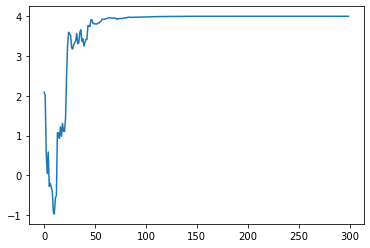

In [6]:
X = np.array(df.drop('F', axis=1))    
y = np.array(df['F'])
gd = gradient_descent(f, X[:], y[:], iter_count=300)#learning rate=0.001
#we need only about 300 iteration count to find our parameters with lr = 0.001
print(gd[0])
plot(range(len(gd[1])), gd[1])

[7.999582193250562, 8.99959141063639, -6.000567636229383, 3.999575983822473, 2.9995828362293557, -2.0004118144076855]


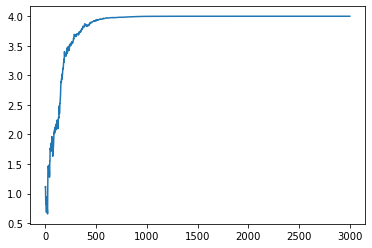

In [7]:
gd = gradient_descent(f, X[:], y[:], iter_count=3000,lr=0.0001)#learning rate=0.0001
#we need only about 3000 iteration count to find our parameters with lr = 0.0001
print(gd[0])
plot(range(len(gd[1])), gd[1])

[7.9992300073754805, 8.99920937934412, -6.00017278870475, 3.999422538713115, 2.999481017038491, -2.000336203306418]


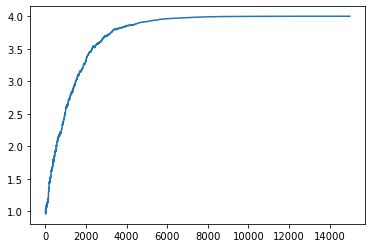

In [8]:
gd = gradient_descent(f, X[:], y[:], iter_count=15000,lr=0.00001)#learning rate=0.00001
#we need only about 15000 iteration count to find our parameters with lr = 0.00001
plot(range(len(gd[1])), gd[1])
print(gd[0])

In [ ]:
a1=8, b1=9, c1=-6, a2=4, b2=3, c2=-2